# Schelling Segregation Model - Quick Start

This notebook demonstrates the **Schelling Segregation Model**, showing how mild preferences can lead to segregation.

- Uses ABSESpy's spatial `PatchModule` and `ActorsList` APIs
- Compatible with Mesa's logic for happiness and movement
- Auto data collection via `cfg.reports`

> **📁 Location**: `examples/schelling/schelling_quick_start.ipynb`  
> **📝 Full Model**: `examples/schelling/model.py`  
> **⚙️ Configuration**: `examples/schelling/config.yaml`

## What Makes This Tutorial Beginner-Friendly?

- ✅ Step-by-step: We build and run, then analyze results
- ✅ Clear explanations: Each ABSESpy feature is explained
- ✅ Copy-paste ready: Works out of the box with this repo
- ✅ Visual learning: See results as you go
- ✅ Progressive complexity: Start simple, add batch experiments


## 1. Import and Setup

This section loads the model and configuration using Hydra.

Config keys of interest:
- `model.width`, `model.height`, `model.density`
- `SchellingAgent.minority_prob`, `SchellingAgent.homophily`, `SchellingAgent.radius`
- `reports.model.*` control model-level reporters
- `time.end` controls max steps

In [1]:
import hydra
import matplotlib.pyplot as plt
from model import Schelling

# Load configuration
with hydra.initialize(config_path=".", version_base=None):
    cfg = hydra.compose(config_name="config")

# Create model
model = Schelling(parameters=cfg, seed=cfg.exp.seed)
print(f"Grid: {cfg.model.width}x{cfg.model.height}, density={cfg.model.density}")
print(
    f"Minority={cfg.SchellingAgent.minority_prob}, homophily={cfg.SchellingAgent.homophily}"
)

Grid: 50x50, density=0.7
Minority=0.4, homophily=0.6


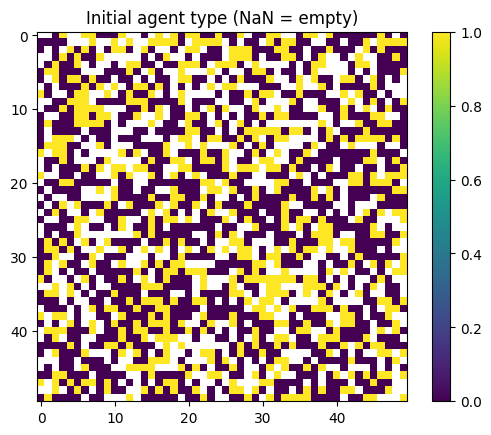

In [2]:
init_type = model.show_type()
plt.imshow(init_type)
plt.title("Initial agent type (NaN = empty)")
plt.colorbar()
plt.show()

## 2. Run Simulation


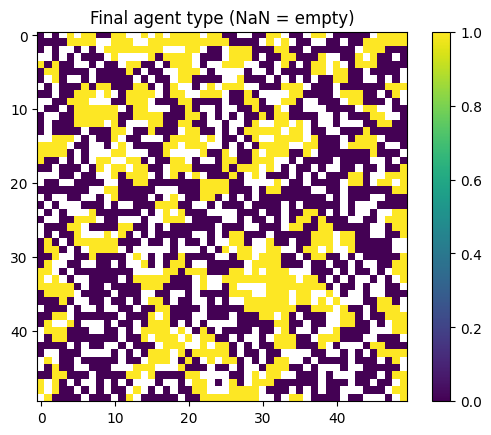

In [3]:
# Run simulation using ABSESpy's built-in method
model.run_model(steps=20)
end_type = model.show_type()
plt.imshow(end_type)
plt.title("Final agent type (NaN = empty)")
plt.colorbar()
plt.show()

## 3. Analyze Collected Data

The model auto-collects data using `reports.model` in `config.yaml`.
- `happy`: number of happy agents in current step
- `happy_ratio`: share of happy agents (0-1)
- `population`: total agents

You can extend reporters by editing `reports.model` and `reports.agent`.


In [4]:
# Get collected data
model_df = model.datacollector.get_model_vars_dataframe()
model_df.tail()

,happy_ratio
10,0.999429
11,0.999429
12,0.999429
13,0.999429
14,1.000000


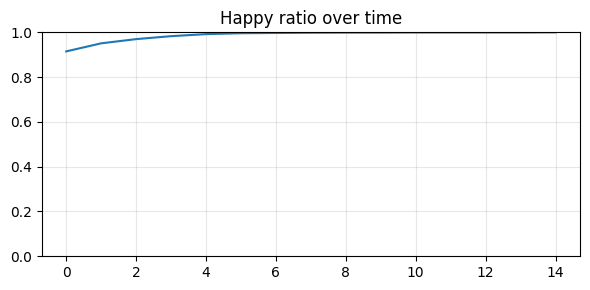

In [5]:
# Plot happy ratio over time
ax = model_df["happy_ratio"].plot(figsize=(6, 3), title="Happy ratio over time")
ax.set_ylim(0, 1.0)
ax.grid(True, alpha=0.3)
ax.figure.tight_layout()